In [72]:
import cv2
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D
from keras.layers import MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam 
from keras.losses import CategoricalCrossentropy, \
BinaryCrossentropy 

In [44]:
os.getcwd()

'D:\\'

In [45]:
data = glob('D:\\data\\train\\*.jpg')

In [46]:
d = plt.imread(data[0])
d = cv2.resize(d,(150,150))

In [47]:
x = np.zeros((25000,150,150,3),dtype=np.float32)

In [48]:
y = np.zeros(25000,dtype=np.int16)

In [49]:
for i,v in enumerate(data):
    value = cv2.imread(v)
    value = cv2.resize(value,(150,150))
    x[i] = value
    if 'cat' in v: 
        y[i] = 0
    else:
        y[i] = 1

In [68]:
np.save('dog_cat.npy',x)

(25000, 150, 150, 3)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [73]:
print(X_train.shape)
print(y_train.shape)

(18750, 150, 150, 3)
(18750,)


In [98]:
input_layer = Conv2D(30,(5,5),activation='relu',input_shape=(150,150,3))
max_pool1 = MaxPooling2D((3,3))
conv1_layer = Conv2D(100,(3,3),activation='relu')
max_pool2 = MaxPooling2D((3,3))
flatten_layer = Flatten()
fc1_layer = Dense(215,activation='relu')
out_layer = Dense(1,activation='sigmoid')

In [110]:
model = Sequential()
model.add(input_layer)
model.add(BatchNormalization())
model.add(max_pool1)
model.add(conv1_layer)
model.add(max_pool2)
model.add(BatchNormalization())
model.add(flatten_layer)
model.add(fc1_layer)
model.add(BatchNormalization())
model.add(out_layer)

In [113]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.models import Input

In [114]:
model.compile(
    optimizer=RMSprop(learning_rate=1e-5),
    loss = BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [115]:
model.fit(X_train,
         y_train,
         epochs=10)

Epoch 1/10
586/586 [==============================] - 370s 631ms/step - loss: 1.2092 - accuracy: 0.5881
Epoch 2/10
586/586 [==============================] - 378s 645ms/step - loss: 0.7120 - accuracy: 0.6617
Epoch 3/10
586/586 [==============================] - 396s 676ms/step - loss: 0.5884 - accuracy: 0.7139
Epoch 4/10
586/586 [==============================] - 372s 635ms/step - loss: 0.5200 - accuracy: 0.7479
Epoch 5/10
 15/586 [..............................] - ETA: 6:06 - loss: 0.4508 - accuracy: 0.7833

KeyboardInterrupt: 

In [116]:
model.evaluate(X_test,y_test)

196/196 [==============================] - 32s 162ms/step - loss: 0.5709 - accuracy: 0.7218


[0.5708673596382141, 0.7217599749565125]

1/1 [==============================] - 0s 37ms/step
['고양이']


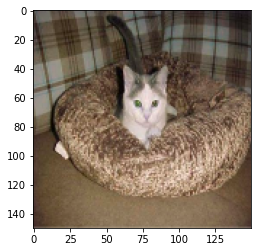

1/1 [==============================] - 0s 26ms/step
['고양이']


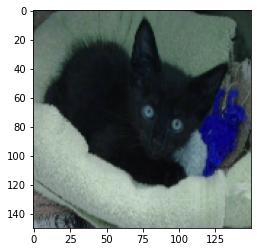

1/1 [==============================] - 0s 26ms/step
['고양이']


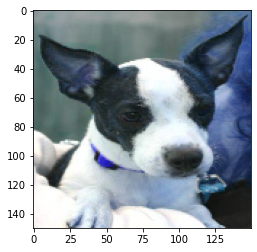

1/1 [==============================] - 0s 31ms/step
['강아지']


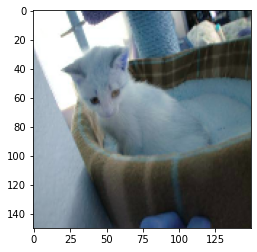

1/1 [==============================] - 0s 32ms/step
['강아지']


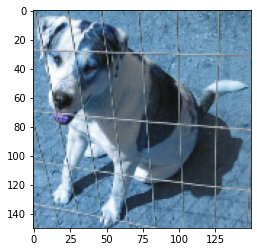

1/1 [==============================] - 0s 25ms/step
['고양이']


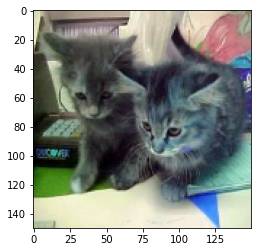

1/1 [==============================] - 0s 32ms/step
['고양이']


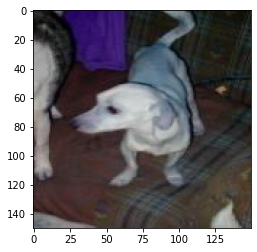

1/1 [==============================] - 0s 29ms/step
['고양이']


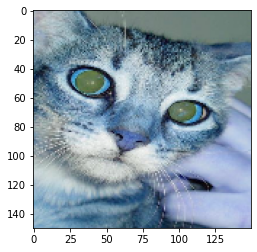

1/1 [==============================] - 0s 41ms/step
['고양이']


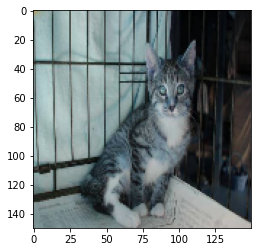

1/1 [==============================] - 0s 32ms/step
['강아지']


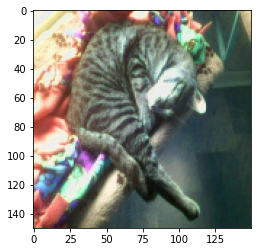

In [121]:
for i in X_test[:10]:
    result = np.where(model.predict(i.reshape(1,150,150,3))>0.5,"강아지","고양이")[0]
    print(result)
    plt.imshow(i.astype(np.int16))
    plt.show()

In [135]:
test_data = plt.imread('02.jpg')
test_data.shape

(274, 394, 3)

In [136]:
test_data = cv2.resize(test_data,(150,150))

In [137]:
np.where(model.predict(test_data.reshape(1,150,150,3))>0.5,"강아지","고양이")

1/1 [==============================] - 0s 45ms/step


array([['강아지']], dtype='<U3')

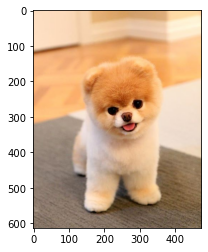

In [134]:
plt.imshow(test_data)

In [138]:
from keras.applications import VGG16

In [141]:
base = VGG16(
    include_top = False,
    input_shape = (150,150,3)
)

In [152]:
base.predict(X_test[0:1]).shape

1/1 [==============================] - 0s 108ms/step


(1, 4, 4, 512)

In [160]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [161]:
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
trans_x_train = base.predict(X_train)
trans_x_test = base.predict(X_test)

399/586 [===================>..........] - ETA: 8:45

In [ ]:
model.fit(
    trans_x_train,
    y_train,
    epochs=30,
    batch_size = 200,
    validation_data=(trans_x_test,y_test)
)